In [174]:
import sqlite3
import matplotlib.pyplot as plt

In [175]:
date = "2022_01_21"

# Experiment time for first 3 block solution
#time = "12:53:11"

time = "10:07:31"

database = "experiments/expt_{}-{}.db".format(date,time)

In [176]:
con = sqlite3.connect(database)
cur = con.cursor()

In [177]:
# Create new table for this experiment
cur.execute("CREATE TABLE IF NOT EXISTS temp_expt AS SELECT * FROM experiments WHERE date=:date AND time=:time", {"date": date, "time": time})

{'whiskers': [<matplotlib.lines.Line2D at 0x7f74aaf02c70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f74aaf11250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f74aaf029a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f74aaf117f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f74aaf11ac0>],
 'means': []}

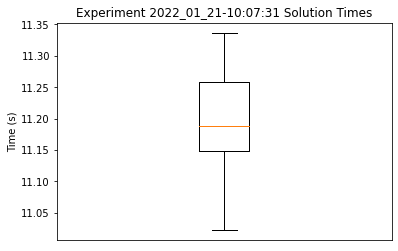

In [178]:
sat_expts = [x[0] for x in cur.execute("SELECT total_time FROM temp_expt WHERE sat=1").fetchall()]
fig1, ax1 = plt.subplots()
fig1.set_facecolor((1, 1, 1))
ax1.set_title("Experiment {}-{} Solution Times".format(date, time))
ax1.set(ylabel='Time (s)')
ax1.get_xaxis().set_visible(False)
ax1.boxplot(sat_expts)


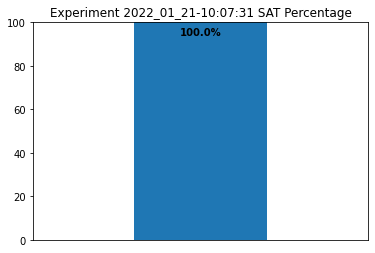

In [179]:
num_sat_expts = len(sat_expts)
num_total_expts = len(cur.execute("SELECT * FROM temp_expt").fetchall())
percentage_sat = num_sat_expts / float(num_total_expts) * 100

fig2, ax2 = plt.subplots()
fig2.set_facecolor((1, 1, 1))
ax2.set_title("Experiment {}-{} SAT Percentage".format(date, time))
ax2.get_xaxis().set_visible(False)
ax2.set_ylim([0,100])
ax2.set_xlim([-1,1])
bar = ax2.bar(0, percentage_sat)

# Display percentage below top of bar
for b in bar:
    w = b.get_width()
    h = b.get_height()
    x, y = b.get_xy()
     
    ax2.text(x+w/2,
             y+h*0.94,
             str(percentage_sat)+'%',
             ha='center',
             weight='bold')

In [173]:
expt_logs = cur.execute("SELECT log FROM temp_expt").fetchall()
print(expt_logs[0][0])

Grounded: 0.001560 
Algebra: 0.000065 
Encoded 1: 0.000939 
1
UNSAT Solution 1: 0.000442 
Encoded 2: 0.000290 
2
UNSAT Solution 2: 0.000673 
Encoded 3: 0.000294 
3
UNSAT Solution 3: 0.001204 
Encoded 4: 0.000314 
0.0:	(pick-from-conveyor a) [3.0]
5.0:	(place a goal) [6.0]
SAT Solution: 0.003590 
Total time: 0.011787 

